In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from network import network

In [2]:
# Step 1: Load and preprocess the data
data = pd.read_csv('../hackmercedxi/diabetesData/diabetes_clean_2015.csv')
target ='DIABETE3'
X = data.copy()  # Input features
Y = data[target]    # Target labels

In [3]:
def train_model(model, train_loader, criterion, optimizer, device, num_epochs=10):
    model.train()
    loss_func = nn.BCEWithLogitsLoss()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            data.to(device)
            target.to(device)
            optimizer.zero_grad()
            try:
                output = model(data)
            except Exception as e:
                print(f"An error occurred during forward pass: {e}")
                return 0
            try:
                loss = loss_func(output, target)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            except Exception as e:
                print(f"An error occurred during backward pass: {e}")
                return 1
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/batch_idx}')
            


In [4]:
# Step 3: Move the model and data to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")
model = network().to(device)

x_train, x_test, y_train, y_test = train_test_split(X.to_numpy(), np.expand_dims(Y.to_numpy(),axis=1), test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(x_train, dtype=torch.float32)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 256

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Number of batches in train_loader:", len(train_loader))
print("Number of batches in test_loader:", len(test_loader))


Device: cpu
Number of batches in train_loader: 828
Number of batches in test_loader: 207


In [8]:
# Step 5: Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=.01)

train_model(model, train_loader, criterion, optimizer, device, num_epochs=10)

Epoch [1/10], Loss: 0.6939853290692782
Epoch [2/10], Loss: 0.6939853290692782
Epoch [3/10], Loss: 0.6939853290692782
Epoch [4/10], Loss: 0.6939853290692782
Epoch [5/10], Loss: 0.6939853290692782
Epoch [6/10], Loss: 0.6939853290692782
Epoch [7/10], Loss: 0.6939853290692782
Epoch [8/10], Loss: 0.6939853290692782
Epoch [9/10], Loss: 0.6939853290692782
Epoch [10/10], Loss: 0.6939853290692782


In [10]:
# Step 8: Save the trained model parameters
torch.save(model.state_dict(), 'model.pth')

Accuracy: 0.8605740181268882


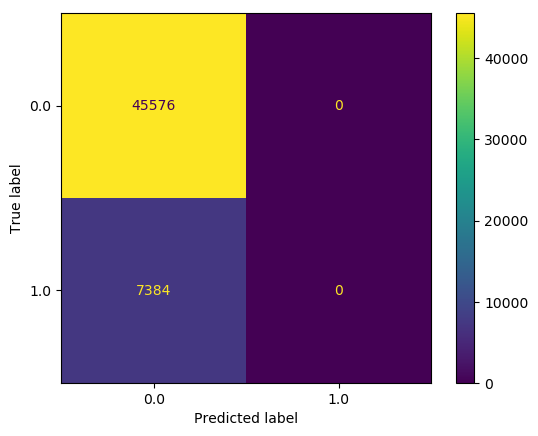

In [9]:
model.eval()

# Step 2: Initialize lists to store predictions and true labels
all_predictions = []
all_targets = []

# Step 3: Iterate through the test DataLoader
with torch.no_grad():  # No need to calculate gradients during inference
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Step 4: Perform inference
        outputs = model(inputs)
        predictions = torch.round(outputs)  # For binary classification with sigmoid activation

        # Step 5: Store predictions and true labels
        all_predictions.extend(predictions.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Step 6: Calculate accuracy
accuracy = accuracy_score(all_targets, all_predictions)
print("Accuracy:", accuracy)

# Step 7: Compute confusion matrix
conf_matrix = confusion_matrix(all_targets, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data['DIABETE3'].unique())  # Adjust display_labels if needed
disp.plot()
plt.show()